# Loading MNIST dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline

import pandas as pd
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, transforms
from torch.utils.data import Subset
import matplotlib.pyplot as plt
import numpy as np

import pickle

In [ ]:
# Create a custom dataset that returns images without labels
'''class UnlabelledDataset(torch.utils.data.Dataset):
    def __init__(self, dataset):
        self.dataset = dataset

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        image, _ = self.dataset[idx]
        return image'''

'class UnlabelledDataset(torch.utils.data.Dataset):\n    def __init__(self, dataset):\n        self.dataset = dataset\n\n    def __len__(self):\n        return len(self.dataset)\n\n    def __getitem__(self, idx):\n        image, _ = self.dataset[idx]\n        return image'

In [ ]:
# Define a transform to convert to PyTorch tensors and normalize the data (shifts pixel values from [0, 1] to [-1, 1])
#transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Define transform: Resize MNIST images to 224x224 to match ViT input size and normalize them
# Define a transform to convert MNIST images to 3 channels and normalize them
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 32x32
    transforms.Grayscale(num_output_channels=3),  # Convert grayscale to 3 channels
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the images
])

# Download and load the MNIST training dataset
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
# Download and load the MNIST test dataset
testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)

# Split the trainset and testset into proprietary labeled and open unlabelled data
proprietary_size_train = len(trainset)//2
total_size_train = len(trainset)
proprietary_size_test = len(testset)//2
total_size_test = len(testset)

# Create Proprietary labeled data indices and Open unlabelled data indices
indices_train = torch.randperm(total_size_train)
proprietary_indices_train = indices_train[:proprietary_size_train]
open_indices_train = indices_train[proprietary_size_train:]

indices_test = torch.randperm(total_size_test)
proprietary_indices_test = indices_test[:proprietary_size_test]
open_indices_test = indices_test[proprietary_size_test:]

# Create proprietary labeled subset and open unlabelled subset
proprietary_subset_train = Subset(trainset, proprietary_indices_train)
open_subset_train = Subset(trainset, open_indices_train)
proprietary_subset_test = Subset(trainset, proprietary_indices_test)
open_subset_test = Subset(trainset, open_indices_test)

# Create an unlabelled dataset from the open subset
open_unlabelled_subset_train = open_subset_train #UnlabelledDataset(open_subset_train)
open_unlabelled_subset_test = open_subset_test #UnlabelledDataset(open_subset_test)

# Create DataLoader objects for both proprietary and open data
proprietary_loader_train = torch.utils.data.DataLoader(proprietary_subset_train, batch_size=64, shuffle=True)
open_unlabelled_loader_train = torch.utils.data.DataLoader(open_unlabelled_subset_train, batch_size=64, shuffle=True)
proprietary_loader_test = torch.utils.data.DataLoader(proprietary_subset_test, batch_size=64, shuffle=True)
open_unlabelled_loader_test = torch.utils.data.DataLoader(open_unlabelled_subset_test, batch_size=64, shuffle=True)

print(f"Proprietary labeled train data size: {len(proprietary_subset_train)}")
print(f"Proprietary labeled test data size: {len(proprietary_subset_test)}")
print(f"Open unlabelled train data size:  {len(open_unlabelled_subset_train)}")
print(f"Open unlabelled test data size: {len(open_unlabelled_subset_test)}")

print(f"Proprietary labeled train data size: {len(proprietary_loader_train)}")
print(f"Open unlabelled train data size: {len(open_unlabelled_loader_train)}")
print(f"Proprietary labeled test data size: {len(proprietary_loader_test)}")
print(f"Open unlabelled train data size: {len(open_unlabelled_loader_test)}")

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:11<00:00, 901097.73it/s] 


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 132246.23it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1247264.15it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 5719162.04it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw

Proprietary labeled train data size: 30000
Proprietary labeled test data size: 5000
Open unlabelled train data size:  30000
Open unlabelled test data size: 5000
Proprietary labeled train data size: 469
Open unlabelled train data size: 469
Proprietary labeled test data size: 79
Open unlabelled train data size: 79


Labels:  tensor([0, 3, 6, 3, 7, 9, 1, 9, 6, 1, 6, 2, 3, 8, 8, 9, 4, 7, 5, 1, 6, 7, 0, 1,
        5, 9, 8, 1, 8, 3, 7, 7, 0, 2, 1, 4, 7, 1, 2, 7, 0, 0, 7, 2, 8, 7, 4, 8,
        7, 9, 3, 8, 5, 1, 3, 6, 0, 8, 5, 0, 1, 0, 0, 5])
Batch shape:  torch.Size([64, 3, 224, 224])


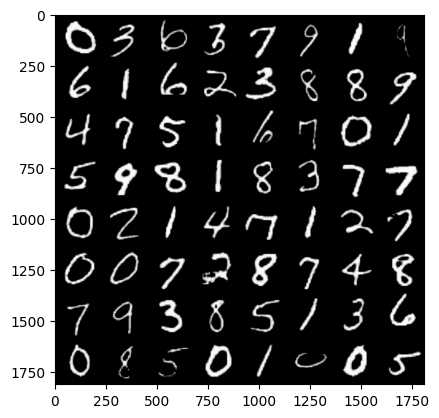

In [ ]:
def show_batch(batch):
    im = torchvision.utils.make_grid(batch)
    plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))

dataiter = iter(open_unlabelled_loader_test)
images, labels = next(dataiter)
# proprietary_loader_train open_unlabelled_loader_train proprietary_loader_test open_unlabelled_loader_test
print('Labels: ', labels)
print('Batch shape: ', images.size())
show_batch(images)

# Loading vit_b_16 model + training on MNIST

In [ ]:
import torch
from torchvision import datasets, transforms, models
from torch import nn, optim
from torch.utils.data import DataLoader
from tqdm import tqdm

# Load the pre-trained Vision Transformer (ViT) model
model = models.vit_b_16(weights=models.ViT_B_16_Weights.IMAGENET1K_V1)  #using pre-trained weights

# Modify the classifier to fit MNIST's 10 classes instead of 1000 ImageNet classes
last_layer = model.heads[-1]
in_features = last_layer.in_features
model.heads = nn.Linear(in_features=in_features, out_features=10)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Move the model to GPU if available
device = torch.device("cuda")
model.to(device)

Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:01<00:00, 229MB/s]


VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [ ]:
#training
train_loader = proprietary_loader_train
test_loader = proprietary_loader_test

#training settings
epochs = 8
train_losses = []

for epoch in range(epochs):
    model.train()  #training mode
    running_loss = 0

    #show progress
    for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}", unit='batch'):
        images, labels = images.to(device), labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)

        # Calculate loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average loss for this epoch
    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)  # Store the average loss

    print(f"Epoch {epoch+1}/{epochs} - Training loss: {avg_loss:.4f}")

Epoch 1/8: 100%|██████████| 469/469 [08:12<00:00,  1.05s/batch]


Epoch 1/8 - Training loss: 2.1282


Epoch 2/8: 100%|██████████| 469/469 [08:14<00:00,  1.05s/batch]


Epoch 2/8 - Training loss: 1.2939


Epoch 3/8: 100%|██████████| 469/469 [08:15<00:00,  1.06s/batch]


Epoch 3/8 - Training loss: 0.7025


Epoch 4/8: 100%|██████████| 469/469 [08:16<00:00,  1.06s/batch]


Epoch 4/8 - Training loss: 0.3002


Epoch 5/8: 100%|██████████| 469/469 [08:16<00:00,  1.06s/batch]


Epoch 5/8 - Training loss: 0.2089


Epoch 6/8: 100%|██████████| 469/469 [08:16<00:00,  1.06s/batch]


Epoch 6/8 - Training loss: 0.1580


Epoch 7/8: 100%|██████████| 469/469 [08:16<00:00,  1.06s/batch]


Epoch 7/8 - Training loss: 0.1417


Epoch 8/8: 100%|██████████| 469/469 [08:16<00:00,  1.06s/batch]

Epoch 8/8 - Training loss: 0.1221


# Evaluating the trained model and the original model on MNIST test set

In [ ]:
# Load the pre-trained Vision Transformer (ViT) model
original_model = models.vit_b_16(weights=models.ViT_B_16_Weights.IMAGENET1K_V1)  #using pre-trained weights

last_layer = original_model.heads[-1]
in_features = last_layer.in_features
# Modify the classifier to fit MNIST's 10 classes instead of 1000 ImageNet classes
original_model.heads = nn.Linear(in_features=in_features, out_features=10)

# Move the model to GPU if available
device = torch.device("cuda")
original_model.to(device)

VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [ ]:
correct_trained = 0
total_trained = 0
with torch.no_grad():
    model.eval()  #evaluation mode
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total_trained += labels.size(0)
        correct_trained += (predicted == labels).sum().item()

    print(f"Test Accuracy of the model after pre training on MNIST: {100 * correct_trained / total_trained}%")


correct_original = 0
total_original = 0
with torch.no_grad():
    original_model.eval()  #evaluation mode
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = original_model(images)
        _, predicted = torch.max(outputs.data, 1)
        total_original += labels.size(0)
        correct_original += (predicted == labels).sum().item()

    print(f"Test Accuracy of the original model: {100 * correct_original / total_original}%")

Test Accuracy of the model after pre training on MNIST: 96.64%
Test Accuracy of the original model: 11.54%


# New model and unlabelled data Saved

In [ ]:
# Save the model's state dictionary
#torch.save(model.state_dict(), "custom_MNIST_vit_b_16_model.pth")
torch.save(model.state_dict(), "/content/drive/My Drive/custom_MNIST_vit_b_16_model.pth")


In [ ]:
#sample from the dataset
sample_img= open_unlabelled_subset_train[0]

#shape of the sample image
print(sample_img)

(tensor([[[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]],

        [[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]]]), 7)


In [ ]:
#save the dataset using pickle
with open('/content/drive/My Drive/open_unlabelled_subset_train.pkl', 'wb') as f:
    pickle.dump(open_unlabelled_subset_train, f)

with open('/content/drive/My Drive/open_unlabelled_subset_test.pkl', 'wb') as f:
    pickle.dump(open_unlabelled_subset_test, f)